In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving anime.csv to anime.csv


In [ ]:
data = pd.read_csv('anime.csv')
data.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
data.info()
#dataset bersumber dari myanimelist.net berisi: nama, genre, tipe, jumlah episode, rating, dan jumlah member pada tahun 2016

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
u = data[(data.episodes == 'Unknown')].index
data = data.drop(u)
data['episodes'] = pd.to_numeric(data['episodes'])
#agar kolom episodes bisa dibuat numerik, maka perlu menghapus anime yang masih ongoing atau episodesnya masih "unknown"

In [ ]:
data['genre'] = data['genre'].str.split(r",", expand=True).iloc[:,0:1]
#menggeneralisir genre berdasarkan genre pertama sebelum koma

In [ ]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Drama,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,Action,TV,64,9.26,793665
2,28977,Gintama°,Action,TV,51,9.25,114262
3,9253,Steins;Gate,Sci-Fi,TV,24,9.17,673572
4,9969,Gintama&#039;,Action,TV,51,9.16,151266


In [ ]:
data.describe()

,anime_id,episodes,rating,members
count,11954.000000,11954.000000,11876.000000,1.195400e+04
mean,13589.705120,12.382550,6.480333,1.836856e+04
std,11209.052798,46.865352,1.021995,5.511078e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3380.250000,1.000000,5.890000,2.290000e+02
50%,9934.500000,2.000000,6.570000,1.579500e+03
75%,23644.500000,12.000000,7.182500,9.755500e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


In [ ]:
data8 = data[data.rating >= 8]
data8.head()
#list anime dengan rating lebih atau sama dengan 8

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Drama,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,Action,TV,64,9.26,793665
2,28977,Gintama°,Action,TV,51,9.25,114262
3,9253,Steins;Gate,Sci-Fi,TV,24,9.17,673572
4,9969,Gintama&#039;,Action,TV,51,9.16,151266


In [ ]:
pd.pivot_table(data,values='rating',index='genre',aggfunc={'rating':['max','min','mean']})
#rating tertinggi, terendah, dan rerata per genre

,max,mean,min
genre,,,
Action,9.26,6.787802,1.92
Adventure,9.00,6.692486,3.47
Cars,8.29,6.018235,4.14
Comedy,10.00,6.518423,2.14
Dementia,8.45,4.893854,2.67
Demons,8.50,6.258571,3.88
Drama,9.37,6.797379,3.33
Ecchi,8.61,6.398750,4.54
Fantasy,9.00,6.229730,3.33


In [ ]:
pd.pivot_table(data,values='rating',index='type',aggfunc={'rating':['max','min','mean']})
##rating tertinggi, terendah, dan rerata per tipe

,max,mean,min
type,,,
Movie,10.00,6.318476,1.92
Music,8.38,5.588665,3.28
ONA,8.26,5.633066,2.67
OVA,9.25,6.370896,2.00
Special,8.66,6.525828,1.67
TV,9.26,6.929143,3.00


In [ ]:
pd.pivot_table(data,values='members',index='genre',aggfunc='sum').style.background_gradient(vmin=0)
#berapa banyak member per genre

,members
genre,
Action,93723445
Adventure,16521307
Cars,57191
Comedy,64822708
Dementia,817195
Demons,713739
Drama,18544028
Ecchi,1507858
Fantasy,2929305


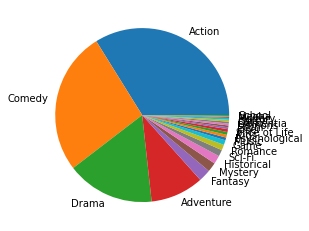

In [ ]:
piechart = data8['genre'].value_counts().rename_axis('genre').reset_index(name='counts')
plt.pie(piechart['counts'],labels=piechart['genre'])
plt.show()
#piechart jumlah anime per genre dengan rating lebih dari atau sama dengan 8

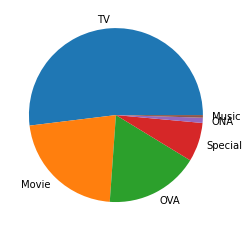

In [ ]:
piechart2 = data8['type'].value_counts().rename_axis('type').reset_index(name='counts')
plt.pie(piechart2['counts'],labels=piechart2['type'])
plt.show()
#piechart jumlah anime per tipe dengan rating lebih dari atau sama dengan 8

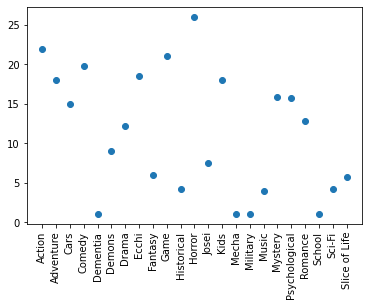

In [ ]:
scatter = pd.pivot_table(data8,values='episodes',index='genre',aggfunc='mean')
scatter_df = pd.DataFrame(scatter)
scatter_df = scatter_df.rename_axis('genre').reset_index().rename(columns={'episodes':'mean_of_episodes'})
plt.scatter(scatter_df['genre'], scatter_df['mean_of_episodes'])
plt.xticks(rotation=90)
plt.show()
#rata- rata jumlah episode per genre dengan rating lebih atau sama dengan 8

<BarContainer object of 6 artists>

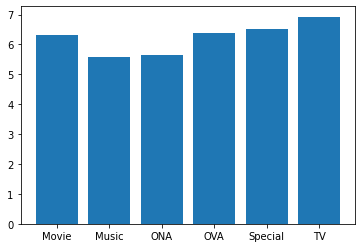

In [ ]:
histogram =pd.pivot_table(data,values='rating',index='type',aggfunc='mean')
histogram_df = pd.DataFrame(histogram)
histogram_df = histogram_df.rename_axis('type').reset_index().rename(columns={'rating':'mean_of_rating'})
plt.bar(histogram_df['type'], histogram_df['mean_of_rating'])
#rata - rata rating per tipe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


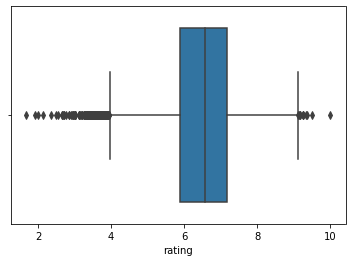

In [ ]:
sns.boxplot(data.rating)
#banyak data pecilan/outlier pada pagar bawah

In [ ]:
#anime bergenre action memiliki peminat paling banyak karena memiliki jumlah member paling banyak
#jumlah anime bergenre action juga paling banyak dibandingkan genre lain
#anime bertipe tv memiliki rata2 rating paling tinggi dibandingkan dengan tipe lainnya
#untuk anime dengan rating 8 keatas, diisi oleh mayoritas anime genre action atau anime tipe tv